# Questão 4

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns; sns.set()


Tipo de entrada

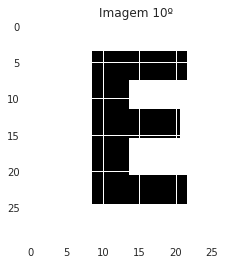

In [26]:
img=mpimg.imread('imagens/30x30/E_0.png')
plt.figure()
imgplot = plt.imshow(img)
plt.title('Imagem 10º')

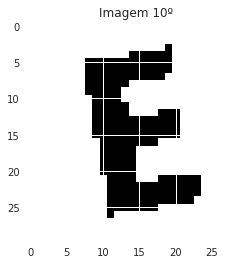

In [3]:
img=mpimg.imread('imagens/30x30/E_10.png')
plt.figure()
imgplot = plt.imshow(img)
plt.title('Imagem 10º')

Organização dos dados

In [4]:
vogal = ['A', 'E', 'I', 'O', 'U']   # vogais
grauT  = ['-10', '0', '10']         # para treinamento
grauV  = ['-5', '5']                # para validação
saida = [[1,0,0],[0,1,0],[0,0,1],[0,0,0],[1,1,1]]

In [5]:
entradaTreino  = []                 # Vetor de vetores de imagens de treinamento
entradaVal=[]                       # Vetor de vetores de imagens de validacao
saidaTreino = []                    # Saída de treinamento
saidaVal = []                       # Saída de validacao

In [6]:
for i in vogal:
    for j in grauT:
        img=mpimg.imread('imagens/30x30/'+i+'_'+j+'.png')
        aux = []
        for k in range(30):
            for l in range(30):
                aux.append(img[k][l][0])        
        entradaTreino.append(aux)            # Transformar uma matriz em vetor

In [7]:
for i in vogal:
    for j in grauV:
        img=mpimg.imread('imagens/30x30/'+i+'_'+j+'.png')
        aux = []
        for k in range(30):
            for l in range(30):
                aux.append(img[k][l][0])                
        entradaVal.append(aux)            # Transformar uma matriz em vetor

In [8]:
for i in saida:
    for j in range(0,3):
        saidaTreino.append(i)        

In [9]:
for i in saida:
    for j in range(0,2):
        saidaVal.append(i)

Treinamento e validação da MLP

In [45]:
#Treinamento da MLP
clf = MLPClassifier(solver='sgd', alpha=10e-5,hidden_layer_sizes=(10),activation='tanh', max_iter=100)
clf.fit(entradaTreino, saidaTreino)

#Validação
y_pred = clf.predict(entradaVal)
print(y_pred)

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 1]]


/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
# Conversão de representação
auxy = []
auxx = []

for item in y_pred:
    if  (str(item) == '[1 0 0]'):
        auxy.append(0)
    elif(str(item) == '[0 1 0]'):
        auxy.append(1)
    elif(str(item) == '[0 0 1]'):
        auxy.append(2)        
    elif(str(item) == '[0 0 0]'):
        auxy.append(3)
    elif(str(item) == '[1 1 1]'):
        auxy.append(4)
        
for item in np.array(saidaVal):
    if  (str(item) == '[1 0 0]'):
        auxx.append(0)
    elif(str(item) == '[0 1 0]'):
        auxx.append(1)
    elif(str(item) == '[0 0 1]'):
        auxx.append(2)        
    elif(str(item) == '[0 0 0]'):
        auxx.append(3)
    elif(str(item) == '[1 1 1]'):
        auxx.append(4)        
        
print(auxy)
print(auxx)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]


In [47]:
# Matriz de confusão
mat = confusion_matrix(auxx, auxy)

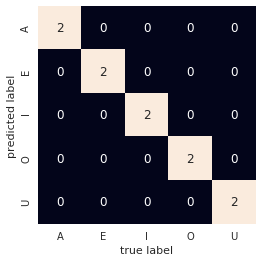

In [48]:
#Apresentação dos resultados
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=['A','E','I','O','U'], yticklabels=['A','E','I','O','U'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()